Hand Written Digits Classifier Using Scikit-Learn Library

This project was conceived with the awareness that thousands of businesses and instances in Indonesia still operate without digitalization, relying heavily on manual handwriting methods.

Background

Information technology plays a crucial role in our lives, providing substantial assistance and convenience in our daily routines. Computers, in particular, have become indispensable tools for gathering information efficiently and in a timely manner. However, in many small-scale instances in Indonesia, whether in government or businesses, there remains a heavy reliance on manual administration processes.

This manual approach comes with several significant drawbacks, chief among them being the potential for numerous human errors in both data entry and interpretation. While the solution to mitigating human errors in data entry is relatively straightforward—digitalization through computerization—it becomes more complex when dealing with pre-existing data that cannot be recreated.

Therefore, there is a pressing need for technology capable of accurately classifying handwritten digits, especially when dealing with sensitive data. This technology can address the challenges associated with manual processes and enhance data accuracy and security.

Previous Cases

Analisis Dan Perancangan Sistem Informasi Pada Kantor Desa Bukit Rawi Berbasis Web
Author Wulandari Agustina


Analisa Dan Perancangan Sistem Informasi Penjualan Dan Pengelolaan Barang Berbasis Web
Author Tulhawa Riva, Fajriah Riri

Goals & Objectives

1. Create A SVM Classifier
2. Optimize 
3. Deploy

# Libraries

In summary my code uses a combination of libraries and modules to perform various machine learning tasks, including data preprocessing, model training, evaluation, and visualization. These libraries and modules are fundamental tools for working with data and building machine learning models in Python.

In [1]:
# Install and import the ibm-watson-machine-learning package
!pip install -U ibm-watson-machine-learning

In [2]:
# import needed libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import json
from ibm_watson_machine_learning import APIClient
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# What The Dataset Looks Like

In this 8 x 8 matrix you can see the shape of 0, where the pixels are represented with the integer from 0 to 16

In [3]:
# Load the dataset from the sklearn and reshape it into a 8x8 matrix
digits = datasets.load_digits()
print(digits.data[0].reshape((8, 8)))
digits.target[0]

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


0

In [4]:
# Print out the number of samples
samples_count = len(digits.images)
print("Number of samples: " + str(samples_count))

Number of samples: 1797


Splitting the datasets into three different subsets a training subset, a traditional test set and a scoring set

In [5]:
# Split the datasets into 2 subset, train and tes. Then split the test set into two more subset, test and score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.3, random_state=42)
X_test, X_score, y_test, y_score = train_test_split(
    X_test, y_test, test_size=0.33, random_state=42)

# Building The Machine Learning Pipeline

After this code snippet is executed, we will have a trained machine learning model represented by the pipeline variable. This model consists of both data preprocessing (scaling) and the SVM classifier. We can use this pipeline to make predictions on new data or evaluate its performance on test data.

In [6]:
# Create a standard scaler and a SVM classifier
scaler = StandardScaler()
svm_classifier = SVC(kernel='rbf')

# Create a pipeline to preprocess the data and build the model
pipeline = Pipeline([('scaler', scaler), ('svm', svm_classifier)])

# Train the model on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

# Evaluate The Model Using Traditional Test Set & Scoring Set

In summary, this code assesses the model's performance in two ways: first, on the traditional test set, and second, on a scoring set (unlabeled data) to evaluate how well the model generalizes to new data. The accuracy scores and classification reports are printed to provide a comprehensive evaluation of the model's performance in both scenarios.

In [7]:
# Predict using the scoring data (X_score)
y_score_pred = pipeline.predict(X_score)

# Evaluate the model's performance on the traditional test set (X_test)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model's accuracy on the traditional test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on traditional test set:", accuracy_test)

# Evaluate the model's accuracy on the scoring set
accuracy_score_set = accuracy_score(y_score, y_score_pred)
print("Accuracy on scoring set:", accuracy_score_set)

# Compare the classification reports for both sets
report_test = classification_report(y_test, y_test_pred)
print("Classification report for traditional test set:\n", report_test)

report_score = classification_report(y_score, y_score_pred)
print("Classification report for scoring set:\n", report_score)


Accuracy on traditional test set: 0.9806094182825484
Accuracy on scoring set: 0.9776536312849162
Classification report for traditional test set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        32
           2       0.94      1.00      0.97        29
           3       1.00      0.93      0.97        30
           4       0.97      1.00      0.99        37
           5       1.00      1.00      1.00        50
           6       0.97      1.00      0.99        37
           7       1.00      0.95      0.97        40
           8       0.94      1.00      0.97        29
           9       0.98      0.93      0.95        44

    accuracy                           0.98       361
   macro avg       0.98      0.98      0.98       361
weighted avg       0.98      0.98      0.98       361

Classification report for scoring set:
               precision    recall  f1-score   support



# Hyperparameter Tuning

In [8]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.001, 0.01, 0.1],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=10, gamma=0.01))])


# Cross Validation

By using cross-validation, this code ensures a more robust evaluation of the model's performance compared to a single train-test split. It helps in assessing how well the model is likely to perform on unseen data and provides a more reliable estimate of its generalization capabilities.

In [9]:
# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(pipeline, digits.data, digits.target, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96388889 0.925      0.94707521 0.94707521 0.94707521]
Mean Accuracy: 0.9460229031259673


# Confusion Matrix

By plotting the confusion matrix as a heatmap, this code offers a visual representation of the model's performance on the test set. It helps in identifying which classes the model is good at predicting and where it might be making errors, such as confusing one class with another. This visualization is valuable for understanding the model's strengths and weaknesses.

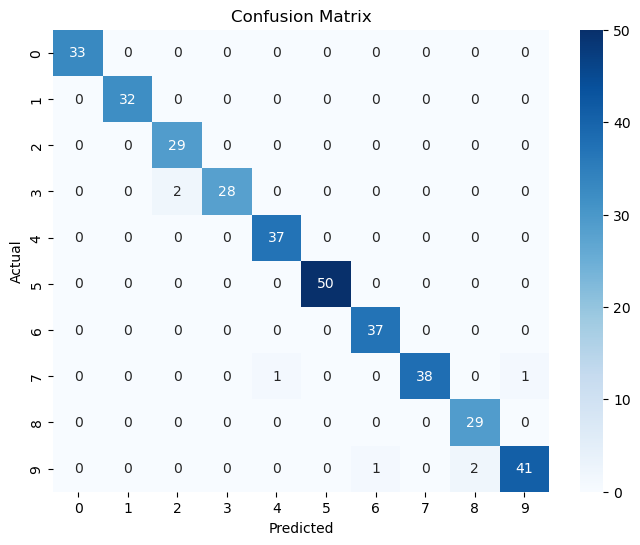

In [10]:
# Compute confusion matrix for the test set
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Connect To IBM Cloud

In [11]:
# Defining the API key and location then storing it in the wml_credentials dictionary
api_key = 'B7puwM5ngDPEpRlE41VarEO8VjrWrHhk2KH3FEnZcrLK'
location = 'https://us-south.ml.cloud.ibm.com'
wml_credentials = {
    "apikey": api_key,
    "url": location
}
# Initialize the APIClient class using the credentials from the previous dictionary
client = APIClient(wml_credentials)

In [12]:
# List out spaces in IBM Cloud
client.spaces.list(limit=10)

# Set the space below as default
space_id = "d472a856-7883-4834-984a-a50a2ecf3a0e"
client.set.default_space(space_id)

------------------------------------  -------------------------  ------------------------
ID                                    NAME                       CREATED
d472a856-7883-4834-984a-a50a2ecf3a0e  SVM Classifier Deployment  2023-09-18T15:16:46.481Z
------------------------------------  -------------------------  ------------------------


'SUCCESS'

In [13]:
# Retrieve the unique identifier for the software spec "runtime-22.2-py3.10"
sofware_spec_uid = client.software_specifications.get_id_by_name("runtime-22.2-py3.10")
print(sofware_spec_uid)

b56101f1-309d-549b-a849-eaa63f77b2fb


In [14]:
# Create a dictionary named metadata with specifics key-value pairs
metadata = {
            client.repository.ModelMetaNames.NAME: 'Sklearn Digits Classifier Model',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.1',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

# This method is used to store the machine learning model in the IBM Cloud repository. It takes several parameters:
published_model = client.repository.store_model(
    model=pipeline,
    meta_props=metadata,
    training_data=X_train,
    training_target=y_train)

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/ibm_watson_machine_learning/repository.py:603: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [15]:
# Retrieves the unique id associated with the previously published model
published_model_uid = client.repository.get_model_uid(published_model)

# Retrieves detailed information based on the uid of the published model
model_details = client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

This method is deprecated, please use get_model_id()
{
  "entity": {
    "hybrid_pipeline_software_specs": [],
    "label_column": "l1",
    "schemas": {
      "input": [
        {
          "fields": [
            {
              "name": "f0",
              "type": "float"
            },
            {
              "name": "f1",
              "type": "float"
            },
            {
              "name": "f2",
              "type": "float"
            },
            {
              "name": "f3",
              "type": "float"
            },
            {
              "name": "f4",
              "type": "float"
            },
            {
              "name": "f5",
              "type": "float"
            },
            {
              "name": "f6",
              "type": "float"
            },
            {
              "name": "f7",
              "type": "float"
            },
            {
              "name": "f8",
              "type": "float"
            },
            {


In [16]:
# This line lists all the models that are available in the IBM Cloud repository
models_details = client.repository.list_models()

------------------------------------  -------------------------------  ------------------------  ----------------  ----------  ----------------
ID                                    NAME                             CREATED                   TYPE              SPEC_STATE  SPEC_REPLACEMENT
ac50b2b4-ef30-4a90-b9b6-96e906a9d4f0  Sklearn Digits Classifier Model  2023-09-22T15:29:51.002Z  scikit-learn_1.1  supported
58a2ca73-6860-45b1-8f61-467fbbe39446  Sklearn Digits Classifier Model  2023-09-22T14:37:28.002Z  scikit-learn_1.1  supported
288193e8-3eb1-4f11-902c-37bc0f7594e5  Sklearn Digits Classifier Model  2023-09-22T13:07:37.002Z  scikit-learn_1.1  supported
------------------------------------  -------------------------------  ------------------------  ----------------  ----------  ----------------


In [17]:
# A new metadata dictionary is created to specify deployment-related properties
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of scikit model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# This code creates a deployment using the specified model and the deployment metadata properties. 
created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: 'ac50b2b4-ef30-4a90-b9b6-96e906a9d4f0' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a2016f11-fcb7-4258-9702-0de4035ce443'
------------------------------------------------------------------------------------------------




In [18]:
# Retrieves the uid associated with the newly created deployment
deployment_uid = client.deployments.get_uid(created_deployment)

# Obtain the scoring endpoint URL
scoring_endpoint = client.deployments.get_scoring_href(created_deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/ml/v4/deployments/a2016f11-fcb7-4258-9702-0de4035ce443/predictions


In [19]:
# List all the deployments available in IBM Cloud
client.deployments.list()

------------------------------------  --------------------------  -----  ------------------------  -------------  ----------  ----------------
GUID                                  NAME                        STATE  CREATED                   ARTIFACT_TYPE  SPEC_STATE  SPEC_REPLACEMENT
a2016f11-fcb7-4258-9702-0de4035ce443  Deployment of scikit model  ready  2023-09-22T15:30:02.359Z  model          supported
ae7c7b48-7717-4be9-89cf-12e7c8ea66c8  Deployment of scikit model  ready  2023-09-22T14:37:32.909Z  model          supported
0a773dbc-95bf-4acb-921f-51739c82f527  Deployment of scikit model  ready  2023-09-22T13:09:23.708Z  model          supported
------------------------------------  --------------------------  -----  ------------------------  -------------  ----------  ----------------


,GUID,NAME,STATE,CREATED,ARTIFACT_TYPE,SPEC_STATE,SPEC_REPLACEMENT
0,a2016f11-fcb7-4258-9702-0de4035ce443,Deployment of scikit model,ready,2023-09-22T15:30:02.359Z,model,supported,
1,ae7c7b48-7717-4be9-89cf-12e7c8ea66c8,Deployment of scikit model,ready,2023-09-22T14:37:32.909Z,model,supported,
2,0a773dbc-95bf-4acb-921f-51739c82f527,Deployment of scikit model,ready,2023-09-22T13:09:23.708Z,model,supported,


In [20]:
# Retrieves the detail information on the deployment
client.deployments.get_details(deployment_uid)

Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.


{'entity': {'asset': {'id': 'ac50b2b4-ef30-4a90-b9b6-96e906a9d4f0'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'Deployment of scikit model',
  'online': {},
  'space_id': 'd472a856-7883-4834-984a-a50a2ecf3a0e',
  'status': {'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/a2016f11-fcb7-4258-9702-0de4035ce443/predictions'},
   'serving_urls': ['https://us-south.ml.cloud.ibm.com/ml/v4/deployments/a2016f11-fcb7-4258-9702-0de4035ce443/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2023-09-22T15:30:02.359Z',
  'id': 'a2016f11-fcb7-4258-9702-0de4035ce443',
  'modified_at': '2023-09-22T15:30:02.359Z',
  'name': 'Deployment of scikit model',
  'owner': 'IBMid-6950002KBW',
  'space_id': 'd472a856-7883-4834-984a-a50a2ecf3a0e'},
 'system': {'warnings': [{'id': 'Deprecated',
    'message': 'online_url is deprecated and will be removed

In [21]:
# Define the datasets use to test the deployed model
score_0 = list(X_score[0])
score_1 = list(X_score[1])

# Define the payload to score in the model deployment
scoring_payload = {"input_data": [{"values": [score_0, score_1]}]}

In [22]:
# This line sends a scoring request to the deployed model using the specified deployment uid and scoring payload. 
# The results are then stored in predictions variable
predictions = client.deployments.score(deployment_uid, scoring_payload)

In [23]:
# Print out the predictions result
print(json.dumps(predictions, indent=2))

{
  "predictions": [
    {
      "fields": [
        "prediction"
      ],
      "values": [
        [
          2
        ],
        [
          4
        ]
      ]
    }
  ]
}


In [24]:
# Check if the predictions made above are true
print("Scoring Data (X_score):")
for i in range(2):  # Print the first 2 sample of scoring data
    x_sample = X_score[i].reshape(8, 8)
    for row in x_sample:
        print(" ".join(map(str, row)))
    print() 

# Print the corresponding labels from the y_score dataset
print("Scoring Labels (y_score):")
print(y_score[:2])  # Print the labels for the first 2 scoring data

Scoring Data (X_score):
0.0 2.0 15.0 16.0 12.0 0.0 0.0 0.0
0.0 8.0 11.0 8.0 16.0 0.0 0.0 0.0
0.0 3.0 1.0 7.0 13.0 0.0 0.0 0.0
0.0 0.0 0.0 10.0 8.0 0.0 0.0 0.0
0.0 0.0 0.0 15.0 5.0 0.0 0.0 0.0
0.0 0.0 7.0 15.0 0.0 0.0 0.0 0.0
0.0 0.0 14.0 11.0 6.0 5.0 2.0 0.0
0.0 1.0 16.0 16.0 16.0 16.0 9.0 0.0

0.0 0.0 3.0 16.0 4.0 0.0 0.0 0.0
0.0 0.0 12.0 13.0 2.0 5.0 0.0 0.0
0.0 2.0 16.0 6.0 10.0 15.0 1.0 0.0
0.0 9.0 15.0 3.0 16.0 11.0 7.0 0.0
0.0 12.0 16.0 16.0 15.0 11.0 5.0 0.0
0.0 3.0 9.0 16.0 3.0 0.0 0.0 0.0
0.0 0.0 2.0 16.0 3.0 0.0 0.0 0.0
0.0 0.0 6.0 14.0 0.0 0.0 0.0 0.0

Scoring Labels (y_score):
[2 4]
